In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

If $\Phi$ is surjective, then every element in $W$ can be "reached" from $V$ using $\Phi$. A bijective $\Phi$ can be "undone", i.e., there exists a mapping $\Psi: W \rightarrow V$ such that $\Psi \circ \Phi(\mathbf{x}) = \mathbf{x}$. This mapping $\Psi$ is then called the **inverse** of $\Phi$ and is normally denoted by $\Phi^{-1}$.

With these definitions, we introduce the following special cases of linear mappings between vector spaces $V$ and $W$:

-   **Isomorphism:** $\Phi: V \rightarrow W$ is linear and bijective.
-   **Endomorphism:** $\Phi: V \rightarrow V$ is linear (a linear mapping from a vector space to itself).
-   **Automorphism:** $\Phi: V \rightarrow V$ is linear and bijective (a linear isomorphism from a vector space to itself).

We define $\text{id}_V: V \rightarrow V$, $\mathbf{x} \mapsto \mathbf{x}$ as the **identity mapping** or **identity automorphism** in $V$.

**Example 2.19 (Homomorphism)**

The mapping $\Phi: \mathbb{R}^2 \rightarrow \mathbb{C}$, defined by $\Phi\left(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}\right) = x_1 + ix_2$, is a homomorphism (a linear mapping):

$$
\Phi\left( \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} + \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} \right) = \Phi\left( \begin{pmatrix} x_1 + y_1 \\ x_2 + y_2 \end{pmatrix} \right) = (x_1 + y_1) + i(x_2 + y_2) = (x_1 + ix_2) + (y_1 + iy_2) = \Phi\left( \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \right) + \Phi\left( \begin{pmatrix} y_1 \\ y_2 \end{pmatrix} \right)
$$

$$
\Phi\left( \lambda \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \right) = \Phi\left( \begin{pmatrix} \lambda x_1 \\ \lambda x_2 \end{pmatrix} \right) = \lambda x_1 + i\lambda x_2 = \lambda(x_1 + ix_2) = \lambda \Phi\left( \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \right). \quad (2.88)
$$

This example also justifies why complex numbers can be represented as tuples in $\mathbb{R}^2$: there exists a bijective linear mapping that converts the element-wise addition of tuples in $\mathbb{R}^2$ into the set of complex numbers with the corresponding addition. Note that we have only shown linearity here, but not the bijection.

**Theorem 2.17 (Theorem 3.59 in Axler (2015)).** Finite-dimensional vector spaces $V$ and $W$ are isomorphic if and only if $\dim(V) = \dim(W)$.

Theorem 2.17 states that there exists a linear, bijective mapping between two vector spaces of the same dimension. Intuitively, this means that vector spaces of the same dimension are fundamentally the same, as they can be transformed into each other without any loss of structure.

Theorem 2.17 also provides the justification to treat $\mathbb{R}^{m \times n}$ (the vector space of $m \times n$ matrices) and $\mathbb{R}^{mn}$ (the vector space of vectors of length $mn$) as essentially the same, because their dimensions are both $mn$, and there exists a linear, bijective mapping that transforms one into the other (e.g., by stacking the columns of the matrix into a single vector).

**Remark.** Consider vector spaces $V, W, X$. Then:

-   For linear mappings $\Phi: V \rightarrow W$ and $\Psi: W \rightarrow X$, the composition $\Psi \circ \Phi: V \rightarrow X$ is also linear.
-   If $\Phi: V \rightarrow W$ is an isomorphism, then its inverse $\Phi^{-1}: W \rightarrow V$ is also an isomorphism.

In [1]:
import numpy as np

def compose_mappings(Psi, Phi):
    """
    Composes two mappings Psi and Phi (Psi o Phi).

    Args:
        Psi (callable): The outer mapping (W -> X).
        Phi (callable): The inner mapping (V -> W).

    Returns:
        callable: The composed mapping (V -> X).
    """
    return lambda x: Psi(Phi(x))

def find_inverse_mapping(Phi, V_elements, W_elements, epsilon=1e-9):
    """
    Attempts to find the inverse mapping Phi_inverse based on example elements,
    assuming Phi is bijective. This is not a general algorithm to find the
    analytical form of the inverse, but rather checks the inverse property
    for the given examples.

    Args:
        Phi (callable): The bijective mapping (V -> W).
        V_elements (list of numpy.ndarray): Example vectors from V.
        W_elements (list of numpy.ndarray): Corresponding vectors in W (Phi(V_elements)).
        epsilon (float): Tolerance for comparisons.

    Returns:
        callable or None: A potential inverse mapping (W -> V) if the inverse
                         property holds for the examples, otherwise None.
    """
    if len(V_elements) != len(W_elements):
        print("Warning: Number of example elements in V and W differ.")
        return None

    forward_map = {tuple(Phi(v).flatten()): v for v in V_elements}

    def Phi_inverse(w):
        w_flat = tuple(w.flatten())
        if w_flat in forward_map:
            return forward_map[w_flat]
        else:
            print(f"Warning: Inverse not found for {w} in the example set.")
            return None

    # Check if Psi o Phi(x) = x for the examples
    Psi = Phi_inverse
    inverse_holds = True
    for x in V_elements:
        if Psi(Phi(x)) is None or not np.allclose(Psi(Phi(x)), x, atol=epsilon):
            print(f"Inverse property check failed for x = {x}")
            inverse_holds = False
            break

    if inverse_holds and forward_map:
        print("Inverse property holds for the provided examples.")
        return Phi_inverse
    else:
        return None

def identity_mapping(V_element):
    """
    The identity mapping id_V(x) = x.

    Args:
        V_element (numpy.ndarray): An element of the vector space V.

    Returns:
        numpy.ndarray: The same element.
    """
    return V_element

if __name__ == '__main__':
    # Example Isomorphism (from R^2 to C represented as R^2)
    iso_phi = lambda v: np.array([v[0], v[1]]) # Represents x1 + ix2 as [x1, x2]
    V_iso = [np.array([1, 0]), np.array([0, 1]), np.array([2, 3])]
    W_iso = [iso_phi(v) for v in V_iso] # In this case, W is the same as V in representation

    # Attempt to find the inverse (which is the same mapping here)
    iso_phi_inverse = find_inverse_mapping(iso_phi, V_iso, W_iso)
    if iso_phi_inverse:
        print(f"Inverse of iso_phi applied to W_iso[2]: {iso_phi_inverse(W_iso[2])}")
        print(f"Original V_iso[2]: {V_iso[2]}")

    # Example Linear Mappings for Composition
    phi_comp = lambda v: np.array([v[0] + v[1], 2 * v[0]]) # R^2 -> R^2
    psi_comp = lambda w: np.array([w[1], w[0] - w[1]])     # R^2 -> R^2
    V_comp = [np.array([1, 0]), np.array([0, 1])]

    composed_mapping = compose_mappings(psi_comp, phi_comp)
    for v in V_comp:
        print(f"Psi(Phi({v})) = {composed_mapping(v)}")

    # Identity Mapping
    v_identity = np.array([4, -1])
    identity_result = identity_mapping(v_identity)
    print(f"Identity mapping of {v_identity}: {identity_result}")

Inverse property holds for the provided examples.
Inverse of iso_phi applied to W_iso[2]: [2 3]
Original V_iso[2]: [2 3]
Psi(Phi([1 0])) = [ 2 -1]
Psi(Phi([0 1])) = [0 1]
Identity mapping of [ 4 -1]: [ 4 -1]


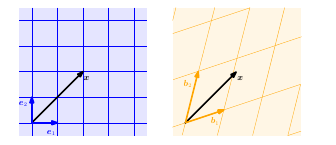

Fig.8 Two different coordinate systems defined by two sets of basis vectors. A vector x has different coordinate representations depending on which coordinate system is chosen.

###  Matrix Representation of Linear Mappings

Any $n$-dimensional vector space is isomorphic to $\mathbb{R}^n$ (Theorem 2.17). Let us consider an ordered basis $\{ \mathbf{b}_1, \ldots, \mathbf{b}_n \}$ of an $n$-dimensional vector space $V$. In the following, the order of the basis vectors will be important. Therefore, we write

$$
B = (\mathbf{b}_1, \ldots, \mathbf{b}_n) \quad (2.89)
$$

and call this $n$-tuple an **ordered basis** of $V$.

**Remark (Notation).** We are at a point where the notation can become a bit intricate. Therefore, we summarize some of the conventions we will use:

-   $B = (\mathbf{b}_1, \ldots, \mathbf{b}_n)$ denotes an ordered basis (an $n$-tuple where the order of the basis vectors matters).
-   $B = \{ \mathbf{b}_1, \ldots, \mathbf{b}_n \}$ denotes an (unordered) basis (a set where the order of the basis vectors does not matter).
-   $B = [\mathbf{b}_1, \ldots, \mathbf{b}_n]$ denotes a matrix whose columns are the vectors $\mathbf{b}_1, \ldots, \mathbf{b}_n$. $\diamond$

**Definition 2.18 (Coordinates).** Consider a vector space $V$ and an ordered basis $B = (\mathbf{b}_1, \ldots, \mathbf{b}_n)$ of $V$. For any vector $\mathbf{x} \in V$, we obtain a unique representation (linear combination)

$$
\mathbf{x} = \alpha_1 \mathbf{b}_1 + \cdots + \alpha_n \mathbf{b}_n. \quad (2.90)
$$

The scalars $\alpha_1, \ldots, \alpha_n$ are called the **coordinates of $\mathbf{x}$ with respect to $B$**, and the vector

$$
\boldsymbol{\alpha} =
\begin{bmatrix}
\alpha_1 \\
\vdots \\
\alpha_n
\end{bmatrix} \in \mathbb{R}^n \quad (2.91)
$$

is the **coordinate vector** or **coordinate representation of $\mathbf{x}$ with respect to the ordered basis $B$**.

Coordinate Systems and Transformation Matrices in Linear Algebra
In linear algebra, a basis defines a coordinate system for a vector space. This notebook explains how vectors are represented in different bases, how to compute coordinates in a new basis, and how transformation matrices encode linear mappings between vector spaces.
1. Coordinate Representation in Different Bases
A vector $\mathbf{x} \in \mathbb{R}^2$ can be expressed as a linear combination of basis vectors. In the standard basis ${\mathbf{e}_1, \mathbf{e}_2}$, where $\mathbf{e}_1 = \begin{bmatrix} 1 \ 0 \end{bmatrix}$ and $\mathbf{e}_2 = \begin{bmatrix} 0 \ 1 \end{bmatrix}$, a vector $\mathbf{x}$ has coordinates $\begin{bmatrix} x_1 \ x_2 \end{bmatrix}$, meaning:
$$\mathbf{x} = x_1 \mathbf{e}_1 + x_2 \mathbf{e}_2$$
However, any basis of $\mathbb{R}^2$ defines a valid coordinate system. For a basis ${\mathbf{b}_1, \mathbf{b}_2}$, the same vector $\mathbf{x}$ is expressed as:
$$\mathbf{x} = c_1 \mathbf{b}_1 + c_2 \mathbf{b}_2$$
where $\begin{bmatrix} c_1 \ c_2 \end{bmatrix}$ are the coordinates of $\mathbf{x}$ with respect to ${\mathbf{b}_1, \mathbf{b}_2}$.
Example
Consider a vector $\mathbf{x} \in \mathbb{R}^2$ with coordinates $\begin{bmatrix} 2 \ 3 \end{bmatrix}$ in the standard basis:
$$\mathbf{x} = 2 \mathbf{e}_1 + 3 \mathbf{e}_2$$
Now, use the basis $\mathbf{b}_1 = \begin{bmatrix} 1 \ -1 \end{bmatrix}$, $\mathbf{b}_2 = \begin{bmatrix} 1 \ 1 \end{bmatrix}$. The coordinates of $\mathbf{x}$ in this basis are $\begin{bmatrix} -1/2 \ 5/2 \end{bmatrix}$, so:
$$\mathbf{x} = -\frac{1}{2} \mathbf{b}_1 + \frac{5}{2} \mathbf{b}_2$$
To find these coordinates, express $\mathbf{x} = \begin{bmatrix} 2 \ 3 \end{bmatrix}$ as a linear combination of $\mathbf{b}_1$ and $\mathbf{b}_2$:
$$\mathbf{x} = c_1 \mathbf{b}_1 + c_2 \mathbf{b}_2 = c_1 \begin{bmatrix} 1 \ -1 \end{bmatrix} + c_2 \begin{bmatrix} 1 \ 1 \end{bmatrix} = \begin{bmatrix} c_1 + c_2 \ -c_1 + c_2 \end{bmatrix}$$
Set this equal to $\mathbf{x} = \begin{bmatrix} 2 \ 3 \end{bmatrix}$:
$$\begin{cases}c_1 + c_2 = 2 \-c_1 + c_2 = 3\end{cases}$$
Solve the system:
$$\begin{aligned}c_1 + c_2 &= 2 \-c_1 + c_2 &= 3\end{aligned}$$
Add the equations:
$$(c_1 + c_2) + (-c_1 + c_2) = 2 + 3 \implies 2c_2 = 5 \implies c_2 = \frac{5}{2}$$
Substitute $c_2 = \frac{5}{2}$ into the first equation:
$$c_1 + \frac{5}{2} = 2 \implies c_1 = 2 - \frac{5}{2} = -\frac{1}{2}$$
Thus, the coordinates are $\begin{bmatrix} -1/2 \ 5/2 \end{bmatrix}$.
Alternatively, use the change-of-basis matrix. The matrix $P = [\mathbf{b}_1, \mathbf{b}_2]$ has columns as the basis vectors:
$$P = \begin{bmatrix} 1 & 1 \ -1 & 1 \end{bmatrix}$$
The coordinates $\mathbf{c} = \begin{bmatrix} c_1 \ c_2 \end{bmatrix}$ satisfy $P \mathbf{c} = \mathbf{x}$. Solve:
$$\mathbf{c} = P^{-1} \mathbf{x}$$
Compute $P^{-1}$:
$$\det(P) = (1)(1) - (1)(-1) = 1 + 1 = 2$$
$$P^{-1} = \frac{1}{2} \begin{bmatrix} 1 & -1 \ 1 & 1 \end{bmatrix}$$
For $\mathbf{x} = \begin{bmatrix} 2 \ 3 \end{bmatrix}$:
$$\mathbf{c} = \frac{1}{2} \begin{bmatrix} 1 & -1 \ 1 & 1 \end{bmatrix} \begin{bmatrix} 2 \ 3 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} 1 \cdot 2 + (-1) \cdot 3 \ 1 \cdot 2 + 1 \cdot 3 \end{bmatrix} = \frac{1}{2} \begin{bmatrix} -1 \ 5 \end{bmatrix} = \begin{bmatrix} -\frac{1}{2} \ \frac{5}{2} \end{bmatrix}$$
This confirms the coordinates $\begin{bmatrix} -1/2 \ 5/2 \end{bmatrix}$.
2. Linear Mappings and Transformation Matrices
A linear mapping $\Phi: V \to W$ between vector spaces $V$ and $W$ with ordered bases $B = (\mathbf{b}_1, \ldots, \mathbf{b}_n)$ and $C = (\mathbf{c}_1, \ldots, \mathbf{c}_m)$ can be represented by a transformation matrix.
Definition
For a linear mapping $\Phi: V \to W$, the image of each basis vector $\mathbf{b}_j \in B$ is expressed in the basis $C$:
$$\Phi(\mathbf{b}j) = \sum{i=1}^m \alpha_{ij} \mathbf{c}_i$$
The coefficients $\alpha_{ij}$ form the transformation matrix $A_\Phi$, an $m \times n$ matrix where $A_\Phi(i, j) = \alpha_{ij}$. The $j$-th column of $A_\Phi$ contains the coordinates of $\Phi(\mathbf{b}_j)$ with respect to $C$.
Example
Consider $V = W = \mathbb{R}^2$, with bases $B = (\mathbf{b}_1, \mathbf{b}_2)$, where $\mathbf{b}_1 = \begin{bmatrix} 1 \ -1 \end{bmatrix}$, $\mathbf{b}_2 = \begin{bmatrix} 1 \ 1 \end{bmatrix}$, and $C = (\mathbf{e}_1, \mathbf{e}_2)$, the standard basis. Let $\Phi: \mathbb{R}^2 \to \mathbb{R}^2$ be the identity mapping $\Phi(\mathbf{x}) = \mathbf{x}$.
Compute $\Phi(\mathbf{b}_j)$:

$\Phi(\mathbf{b}_1) = \mathbf{b}_1 = \begin{bmatrix} 1 \ -1 \end{bmatrix} = 1 \cdot \mathbf{e}_1 - 1 \cdot \mathbf{e}_2$, so the coordinates with respect to $C$ are $\begin{bmatrix} 1 \ -1 \end{bmatrix}$.
$\Phi(\mathbf{b}_2) = \mathbf{b}_2 = \begin{bmatrix} 1 \ 1 \end{bmatrix} = 1 \cdot \mathbf{e}_1 + 1 \cdot \mathbf{e}_2$, so the coordinates are $\begin{bmatrix} 1 \ 1 \end{bmatrix}$.

The transformation matrix is:
$$A_\Phi = \begin{bmatrix} 1 & 1 \ -1 & 1 \end{bmatrix}$$
This matrix $P = [\mathbf{b}_1, \mathbf{b}_2]$ maps coordinates from $B$ to $C$, consistent with the change-of-basis matrix.
3. Generalization to $n$-Dimensional Vector Spaces
For an $n$-dimensional vector space $V$ with basis $B = (\mathbf{b}_1, \ldots, \mathbf{b}_n)$, the mapping $\Phi: \mathbb{R}^n \to V$, defined by $\Phi(\mathbf{e}_i) = \mathbf{b}_i$, is a linear isomorphism. The matrix $P = [\mathbf{b}_1, \ldots, \mathbf{b}_n]$ transforms coordinates from the standard basis to $B$:
$$\mathbf{x}V = P \mathbf{x}{\text{std}}$$
To find coordinates in $B$, compute:
$$\mathbf{x}_{\text{std}} = P^{-1} \mathbf{x}_V$$
This framework extends to transformation matrices for any linear mapping between finite-dimensional vector spaces.
Conclusion

A basis defines a coordinate system, and vectors have different coordinate representations depending on the chosen basis.
The change-of-basis matrix converts coordinates between bases.
Transformation matrices encode linear mappings, with columns representing the images of basis vectors in the target basis.

For further exploration, try computing transformation matrices for other linear mappings or bases!


In [2]:
# Matrix multiplication for 2x2 matrix and 2x1 vector
def matrix_vector_multiply(matrix, vector):
    result = [0, 0]
    for i in range(2):
        for j in range(2):
            result[i] += matrix[i][j] * vector[j]
    return result

# Matrix inverse for a 2x2 matrix
def matrix_inverse(matrix):
    # Compute determinant
    det = matrix[0][0] * matrix[1][1] - matrix[0][1] * matrix[1][0]
    if det == 0:
        raise ValueError("Matrix is not invertible")
    
    # Compute inverse: (1/det) * adjugate
    inv_det = 1 / det
    inverse = [
        [matrix[1][1] * inv_det, -matrix[0][1] * inv_det],
        [-matrix[1][0] * inv_det, matrix[0][0] * inv_det]
    ]
    return inverse

# Compute coordinates in new basis
def coordinates_in_new_basis(x, basis):
    # basis is a 2x2 matrix [b1, b2]
    # x is a 2x1 vector
    P = basis  # Change-of-basis matrix
    P_inv = matrix_inverse(P)
    c = matrix_vector_multiply(P_inv, x)
    return c

# Compute transformation matrix for identity mapping
def transformation_matrix_identity(basis_B, basis_C):
    # For identity mapping, Phi(b_j) = b_j
    # Express b_j in terms of basis C (standard basis)
    A = [[0, 0], [0, 0]]
    for j in range(2):
        # b_j is the j-th column of basis_B
        b_j = [basis_B[0][j], basis_B[1][j]]
        # Since basis_C is standard basis, coordinates of b_j in C are b_j itself
        A[0][j] = b_j[0]
        A[1][j] = b_j[1]
    return A

# Example data
x = [2, 3]  # Vector x in standard basis
basis_B = [
    [1, 1],  # b1 = [1, -1], b2 = [1, 1]
    [-1, 1]
]
basis_C = [
    [1, 0],  # e1 = [1, 0], e2 = [0, 1]
    [0, 1]
]

# Compute coordinates in new basis
c = coordinates_in_new_basis(x, basis_B)
print(f"Coordinates of x = {x} in basis B: {c}")

# Compute transformation matrix for identity mapping
A = transformation_matrix_identity(basis_B, basis_C)
print("Transformation matrix A_Phi:")
for row in A:
    print(row)

Coordinates of x = [2, 3] in basis B: [-0.5, 2.5]
Transformation matrix A_Phi:
[1, 1]
[-1, 1]
